# Examen Módulo 2 - Montecarlo - 3.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [205]:
def tipo1(f,a,b,N):
    u=np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [ ]:
def f(x):
    return 

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [172]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def montecarlo2(x,y):
    return (np.exp(-0.05*(x**2+y**2)))*(np.sin(x**2 + y**2)) > (0.5)

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

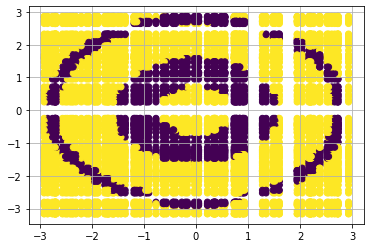

In [189]:
x = np.random.uniform(-3,3,100)
y = np.random.uniform(-3.2,3,100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y,c=~montecarlo2(X,Y))
plt.grid()

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [203]:
N=np.logspace(1,6,6)
N

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [204]:
def montecarlo(region, a1, b1, a2, b2, N) :
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    B = region(x,y)
    AR = (b1-a1)*(b2-a2)
    return np.mean(B)*AR
table = pd.DataFrame(columns = ["Aproximación","Error relativo"], index = N)
for i in N:
    table.loc[i,"Aproximación"]= montecarlo(montecarlo2,-3,3,-3.2,3,int(i))
    
ax = -3
bx = 3
ay = -3.2
by = 3

AR = (bx-ax)*(by-ay)
for i in N:
    AD = table["Aproximación"][i]
    z= np.sqrt((1-(AD/AR))/(AD/AR))
    table["Error relativo"][i] = z
    
table

,Aproximación,Error relativo
10.0,11.16,1.527525
100.0,10.044,1.644294
1000.0,11.2716,1.516684
10000.0,11.1228,1.53117
100000.0,10.8717,1.55619
1000000.0,10.902725,1.553059


---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [1]:
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Tesla** o **Google**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 5 de noviembre del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [53]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

2. Obtenga los precios de cierre ajustados para TSLA Y GOOGL Libre desde el 31 de octubre de 2020 al 31 de octubre de 2022.

In [54]:
names = ["TSLA", "GOOGL"]
data = getClose(names, "2020-10-31", "today")
data

Symbols,TSLA,GOOGL
Date,,
2020-11-02,133.503326,81.216003
2020-11-03,141.300003,82.282997
2020-11-04,140.326660,87.292503
2020-11-05,146.029999,88.125000
2020-11-06,143.316666,87.986504
...,...,...
2022-10-25,222.419998,104.480003
2022-10-26,224.639999,94.930000
2022-10-27,225.089996,92.220001


3. Calcule el rendimiento **simple** para ambas empresas.

In [147]:
data.shift()
R = (data- data.shift())/(data.shift())
R.describe()

Symbols,TSLA,GOOGL
count,502.000000,502.000000
mean,0.001778,0.000492
std,0.037931,0.019521
min,-0.121841,-0.091405
25%,-0.019489,-0.009435
50%,0.002001,0.000920
75%,0.022117,0.010386
max,0.196412,0.076557


4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [121]:
from datetime import datetime, timedelta
def sim_r(media, std, inicio, final, N) :
    fi=inicio
    ff=final
    fechai = datetime.strptime(fi, "%Y-%m-%d")
    fechaf = datetime.strptime(ff, "%Y-%m-%d")
    dias = (fechaf - fechai) / timedelta(days=1)
    fechas=pd.date_range(inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=np.random.normal(media,std,(int(dias),N)))

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de octubre de 2022 al 5 de febrero de 2023.

In [122]:
data1= getClose("TSLA", "2020-10-31", "today")
r1 = np.log(data1/data1.shift())
sim_r(r1.mean(), r1.std(), "2022-10-31","2023-02-05",100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-10-31,-0.000066,0.054956,0.007600,0.012626,-0.066526,0.002154,-0.015999,0.019409,0.043233,-0.047056,...,0.054858,0.037278,-0.037130,0.062815,-0.060668,0.067084,0.024039,-0.047291,-0.018378,-0.002970
2022-11-01,-0.027936,-0.021488,-0.041259,0.033150,-0.003546,0.021947,0.034680,-0.025536,-0.003300,0.003110,...,-0.023632,-0.004687,0.046344,-0.073392,0.019622,-0.011798,0.082742,0.073041,-0.013361,0.070577
2022-11-02,-0.028444,0.009359,-0.003394,0.000565,0.020970,0.034227,0.036189,0.003604,0.005759,-0.009524,...,0.014908,-0.025041,0.038447,0.008169,-0.002964,-0.009980,-0.059856,0.023530,-0.008101,-0.028849
2022-11-03,-0.029525,-0.049732,-0.009114,-0.036929,0.018411,0.029958,0.024049,0.017071,0.002288,0.041773,...,0.026407,-0.062216,0.004384,-0.035382,-0.058249,-0.051095,-0.024724,0.000912,0.051031,-0.010071
2022-11-04,-0.015727,-0.031881,-0.012742,0.034356,-0.076986,-0.014128,0.026281,0.032364,-0.048597,0.038715,...,-0.001726,0.002840,0.059680,0.004107,0.021712,-0.007120,0.008614,0.053484,-0.026786,0.035531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.005726,0.037043,0.027183,0.028372,-0.032114,-0.029585,-0.036517,0.007244,0.030109,0.025097,...,0.015128,0.026531,0.036126,-0.004798,-0.006762,-0.026709,-0.040215,-0.074686,-0.034480,-0.008999
2023-02-01,0.021441,-0.013236,-0.124233,0.008132,0.083600,0.023317,-0.094656,0.003820,-0.004184,0.021378,...,-0.011943,-0.001941,0.028276,0.026987,-0.030791,0.044028,-0.000593,-0.011466,0.066323,0.022558
2023-02-02,-0.029836,-0.034943,0.060309,-0.029447,0.022603,0.048577,-0.010275,-0.033062,0.071338,0.061376,...,-0.022574,-0.002705,-0.068116,0.059071,0.032762,-0.026588,0.023712,0.038605,0.012485,-0.009773
2023-02-03,-0.021523,0.021345,-0.047601,0.018960,0.001487,-0.021515,-0.046229,-0.048185,-0.005516,-0.008612,...,-0.015592,0.025998,-0.003354,-0.076500,-0.047954,-0.016473,-0.014398,0.065044,0.017051,-0.002305


In [123]:
data2= getClose("GOOGL", "2020-10-31", "today")
r2 = np.log(data2/data2.shift())
sim_r(r2.mean(), r2.std(), "2022-10-31","2023-02-05",100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-10-31,-0.003023,0.004886,0.018852,0.017292,0.000541,0.033517,-0.010276,-0.029625,-0.025116,-0.011099,...,-0.015700,-0.000733,0.016001,-0.011087,0.002265,-0.005139,0.025946,-0.041270,-0.022922,0.008717
2022-11-01,0.007690,-0.002695,-0.016487,-0.053992,0.032243,0.043392,0.019624,0.002910,-0.001291,0.041188,...,-0.008746,0.017578,0.007140,0.021763,-0.004130,0.023207,-0.025663,-0.006344,0.027557,0.014691
2022-11-02,0.005017,0.044057,-0.007985,0.029956,0.032775,-0.011741,0.018913,-0.011958,0.006968,-0.005665,...,0.013355,-0.017164,-0.052010,0.000879,-0.019309,0.017475,0.032814,-0.024531,-0.002628,0.019680
2022-11-03,-0.004165,0.025425,-0.014985,0.033238,-0.000279,-0.004338,-0.010433,-0.001542,-0.010590,-0.042574,...,0.017051,-0.025855,-0.005220,0.005696,0.033645,0.024614,-0.001347,0.041991,0.010040,0.003951
2022-11-04,-0.002554,-0.025570,-0.006398,0.031177,0.020243,-0.002122,-0.015738,0.040954,-0.034543,-0.039615,...,-0.032216,0.010542,0.046333,0.025127,-0.022350,-0.016135,0.001098,0.000854,0.022674,0.004511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.003504,0.013184,0.019204,-0.031671,-0.002474,0.023454,-0.015508,-0.001685,-0.010314,0.022657,...,0.031561,-0.027109,-0.004084,-0.003745,0.014278,-0.006867,0.000878,0.015954,-0.016751,0.010928
2023-02-01,0.028322,0.016257,0.010948,0.025448,0.003568,-0.012275,0.003118,0.022318,-0.013455,0.011827,...,0.045957,0.016462,-0.000850,-0.013304,0.002029,0.017163,0.002900,0.006952,-0.008690,-0.011399
2023-02-02,-0.002212,0.050086,-0.017724,-0.002635,-0.007159,-0.005996,0.023001,-0.019661,-0.014931,-0.025069,...,0.009619,-0.017460,0.031084,-0.006305,0.006922,-0.028572,0.015837,-0.009984,0.002577,0.009926
2023-02-03,0.011000,-0.003201,0.005967,0.003830,-0.007348,0.005454,0.021138,-0.000539,-0.013902,0.026901,...,-0.001458,0.004072,0.003921,0.037610,-0.026087,-0.017068,-0.009141,0.003014,0.006582,0.009257


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [129]:
r1 = np.log(data1/data1.shift()).dropna()
media_tsla = r.mean()
std_tsla = r.std()

r_simulados1= sim_r(media_tsla, std_tsla, "2022-10-05","2023-02-05", 1000)
a=(1+r_simulados1).cumprod()*data1[-1]
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-10-05,236.278336,227.469438,238.817051,214.524898,227.260981,224.058750,224.044252,212.333039,222.017754,235.716054,...,243.099802,232.437762,226.013669,230.580706,225.392874,212.714151,243.984317,239.412391,221.564923,228.049987
2022-10-06,233.381716,230.699214,246.375753,229.538639,223.160998,230.725494,214.793665,219.838205,224.188250,263.263645,...,247.931484,226.389105,227.794970,217.703241,226.761863,219.805988,242.398293,238.910006,208.478547,218.628208
2022-10-07,223.107828,243.067063,250.094601,234.093687,233.675433,245.632946,224.916037,197.704885,211.020877,257.434804,...,248.779614,224.735437,222.343106,216.935603,211.212030,223.469887,230.492538,258.144533,208.235870,222.784593
2022-10-08,234.269695,243.402076,260.949801,239.936981,238.416912,250.277523,231.672571,191.995558,214.535756,264.295250,...,257.770093,240.449167,212.953273,220.321254,210.897266,221.787341,232.018973,264.931548,223.176903,224.023677
2022-10-09,226.745079,237.473854,250.744306,229.824139,235.195400,261.874709,230.407982,190.885709,205.749395,286.975690,...,277.051074,250.098046,201.819787,222.168737,200.770657,216.756397,221.019275,258.410939,220.146199,233.823317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,122.607853,239.778110,135.444059,465.792002,187.976358,226.434698,179.689803,167.791135,100.215723,195.911522,...,248.613176,218.794350,324.250817,110.405119,124.735966,107.399451,126.191326,122.638544,100.192825,139.086112
2023-02-01,121.816550,235.654618,134.138347,480.570751,195.507613,209.177644,167.498688,162.141522,101.163233,208.641315,...,242.904998,220.740035,351.017694,110.157391,129.922895,105.314893,121.797846,117.778502,101.881807,138.299927
2023-02-02,121.431800,230.928608,137.400896,456.009776,187.227674,210.174810,153.086819,164.487262,102.415675,200.653273,...,244.207318,202.800955,361.320032,108.669956,138.105239,112.307082,124.072309,120.153098,106.711497,141.887530
2023-02-03,123.610756,224.875493,139.262064,453.834718,192.056213,219.245483,159.092109,156.002204,97.502342,209.776673,...,257.404790,199.662257,368.966046,109.662483,142.953704,114.201706,119.782133,124.220481,107.115596,135.115649


In [130]:
r2 = np.log(data2/data2.shift()).dropna()
media_googl = r.mean()
std_googl = r.std()

r_simulados2= sim_r(media_googl, std_googl, "2022-10-05","2023-02-05", 1000)
b=(1+r_simulados2).cumprod()*data2[-1]
b

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-10-05,93.902672,95.153205,93.802242,94.818367,89.549632,94.385660,98.006651,94.118779,96.374956,91.412976,...,96.454220,99.366066,99.629574,94.067060,98.918287,94.673190,98.097528,97.545024,94.075078,96.870735
2022-10-06,100.584376,103.229414,87.737280,97.915327,86.945987,97.251792,94.998546,87.094876,95.696792,95.353543,...,104.867221,102.318549,100.719948,91.683274,96.667840,100.459908,93.665483,95.615378,97.067115,95.532386
2022-10-07,96.795637,102.187109,85.005916,86.251327,90.239081,94.216649,94.339388,88.556824,98.910631,99.078816,...,104.330078,102.252716,102.388738,88.988014,97.811998,105.022428,94.957897,93.894478,96.186443,97.107121
2022-10-08,100.580232,99.806581,85.615585,83.156111,97.626520,94.763571,85.869830,86.522694,104.094914,92.590959,...,104.628069,107.678962,100.246150,90.411685,96.010989,101.464266,94.379454,92.276983,96.619377,92.592550
2022-10-09,102.218316,102.760200,86.212546,82.941282,96.590786,87.958050,84.833259,81.692945,106.051088,99.972449,...,107.453203,115.441781,108.802118,92.770354,93.709080,98.954780,88.379482,92.350654,100.224835,91.965533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,85.741876,258.051121,84.521277,109.637500,67.007527,58.968486,49.880412,141.341724,119.919289,71.702102,...,147.513737,156.814537,122.106632,112.425424,42.356694,140.104707,75.369066,62.269472,86.494022,60.436971
2023-02-01,86.015322,264.235364,82.519776,110.380968,64.306059,59.098637,53.129028,151.089777,117.843660,74.156549,...,150.129450,150.307850,120.543155,117.654119,42.884756,133.886824,70.165730,64.485489,93.165838,58.856815
2023-02-02,88.495449,247.135289,82.065011,106.979935,61.571876,62.424965,50.987960,156.689296,113.362219,76.632850,...,152.035440,156.062937,123.376263,116.507599,44.163540,128.363014,72.008381,62.164576,95.306839,57.190291
2023-02-03,82.943202,251.801911,82.675090,101.585083,59.836902,63.992023,52.901229,154.025119,116.137285,74.311020,...,145.724503,163.432467,122.944478,115.000226,42.861898,130.162423,74.849760,60.336926,98.734151,54.793370


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas? TSLA

<AxesSubplot:>

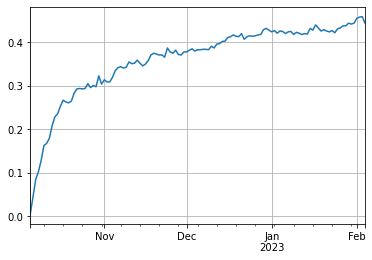

In [131]:
valor_deseado1 = data1[-1]*1.10
retorno = (1+r_simulados1).cumprod()*data1[-1]
bs_tsla = retorno >= valor_deseado1
ps_tsla = bs_tsla.mean(axis=1)
ps_tsla.plot(grid=True)

<AxesSubplot:>

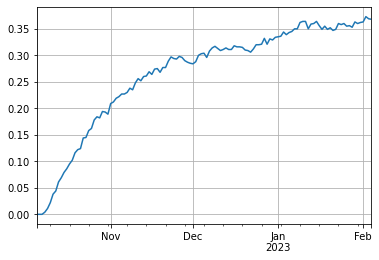

In [132]:
valor_deseado2 = data2[-1]*1.20
retorno2 = (1+ r_simulados2).cumprod()*data2[-1]
bs_googl = retorno2 >= valor_deseado2
ps_googl = bs_googl.mean(axis=1)
ps_googl.plot(grid=True)

#### Extra <font size='1'>(10 puntos)</font>

Utiliza el rendimiento logarítimico y compara los resultados.

In [150]:
import numpy as np
rl = np.log(data/data.shift())
R.dropna().head()

Symbols,TSLA,GOOGL
Date,,
2020-11-03,0.058401,0.013138
2020-11-04,-0.006888,0.060881
2020-11-05,0.040643,0.009537
2020-11-06,-0.018581,-0.001572
2020-11-09,-0.020212,0.000960


In [151]:
rl=(np.log(data)-np.log(data.shift())).dropna()
rl.describe()

Symbols,TSLA,GOOGL
count,502.000000,502.000000
mean,0.001062,0.000302
std,0.037829,0.019519
min,-0.129928,-0.095856
25%,-0.019682,-0.009480
50%,0.001999,0.000920
75%,0.021876,0.010332
max,0.179327,0.073768


In [152]:
R.describe() #COMPARACION

Symbols,TSLA,GOOGL
count,502.000000,502.000000
mean,0.001778,0.000492
std,0.037931,0.019521
min,-0.121841,-0.091405
25%,-0.019489,-0.009435
50%,0.002001,0.000920
75%,0.022117,0.010386
max,0.196412,0.076557


array([[<AxesSubplot:title={'center':'TSLA'}>,
        <AxesSubplot:title={'center':'GOOGL'}>]], dtype=object)

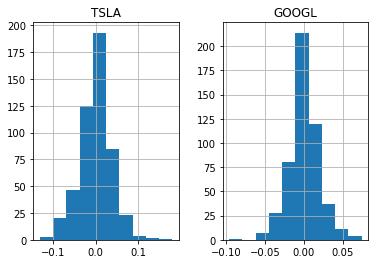

In [145]:
rl.hist()